
# **Module 2 Project - Northwind Database**

* Student name: **Alex Husted**
* Student pace: **Online Full Time - April Cohort**
* Scheduled project review date/time: **Wednesday April 19**
* Instructor name: **Rafael Carrasco**
* Blog post URL: **Work in Progress**

# **Project Outline**

This notebook represents the final project in Module 2 of Flatiron's Data Science Bootcamp. The Module began by introducing the mathematical-based topics of linear algebra, calculus, and cost functions. Then a deeper understanding of SQLlite and SQLalchemy were provided with a review of table relationships and databases. Following up, Module 2 initiated the disciplines of webscraping, accessing data through APIs, and employing HTML/CSS syntax. Around the midpoint, the module turned towards intensive lessons on data distributions and sampling. These statistical lessons dove farther in the proceeding sections on combinatorial probabilities and then into hypothesis testing. Module 2 concluded with the practical utilization of the Monty Carlo simulations and extended regression practices. 


In this project, I will be working with the Northwind database - a free, open-source dataset created by Microsoft containing data from a fictional company. The goal of this project is to gather information from a real-world database and utilize existing knowledge of statistical analysis and hypothesis testing to produce analytical insights that can be of value to the company. To accomplish this, I will query the database to get data needed to perform a statistical analysis of **hypothesis questions** generated to help the company analyze strengths and weaknesses, as well as identifying future opportunities. 


The project workflow follows a scientific approach to hypothesis testing. First, in hopes with providing the buisness with valuable insights, a relevant question will be asked about the dataset. Then, two hypothesis in the form of a null and an alternative, will be generated to answer the relevant question. Next, exploration and investigation will occur to determine which sample test should be used to analyze populations within the dataset. Running the test as well as interpreting results will then help accept or reject the given hypothesis. Finally, business recommendations and further work will be provided for the purpose of putting results into action. 




## Hypothesis Testing Framework



  * **State a Question:** What would we like to know about Northwind?
  * **Quantify:** Measure the population to construct a test.
  * **Form a Hypothesis:** Identify the null and alternative hypothesis.
  * **Exploration:** Become curious about the test data. 
  * **Determine a Test:** Find a best-fit test for the hypothesis.
  * **Run a Test:** Complete quantitative operations.
  * **Interpret Results:** Do the results help answer the question?
  * **Recommendation:** Provide the business with scientific insight.
  * **Further Work:** What else can be done?

# **Project PreWork** 

Before moving forward with hypothesis testing, there are necessary steps to become familiar with Northwind. First, importing libraries needed to complete an analysis of the data would be helpful. Then it's important to examine the moving parts within Northwind. Who are the stakeholders? What does Northwind sell? Who are the employees? Who are Northwind's customers? Questions like these will help develop a better understanding of the dataset and eventually will guide effective hypothesis generation. 

## Import Libraries

In [1]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import SciPy
from scipy import stats
from scipy.special import comb
import math

# Import StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Import SkLearn
from sklearn.utils import resample

# Import Visuals
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

# Import SQL Alchemy
import sqlalchemy
from sqlalchemy import create_engine 
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

## Connect to Database

In [2]:
# Create a session for ORM
engine = create_engine('sqlite:///Northwind_small.sqlite', echo = True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)

2019-06-20 13:07:33,763 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-20 13:07:33,764 INFO sqlalchemy.engine.base.Engine ()
2019-06-20 13:07:33,766 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-20 13:07:33,766 INFO sqlalchemy.engine.base.Engine ()


## SQL Alchemy

For this project I will be using SQLAlchemy. SQLAlchemy provides a “Pythonic” way of interacting with a database. Rather than dealing with the differences between specific dialects of MySQL or SQLite, you can leverage Python framework of SQLAlchemy to streamline your workflow and more efficiently query data. SQLAlchemy can be used to automatically load tables from a database using something called reflection. Reflection is the process of reading the database and building the metadata based on that information. Overall, it provides a full suite of well known enterprise-level persistence patterns, designed for efficient and high-performing database access, adapted into a simple and Pythonic language. 

# **Exploring Northwind**

Exploratory Data Analysis, or EDA, is an integral part of understanding the Northwind dataset. Before moving towards testing hypothesis for the company, it's vital to become familiar with different realtionships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding results. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the database.

## Table Information

When working with a new database it's vital to inspect the tables until there is confidence in the information retained inside the tables. After fetching data inside tables within the database, an Entity Relationship Diagram can be drawn to depict the relationships within Northwind. This step is not required, but it can provide useful documentation for stakeholders within the company. For this section, I will be retrieving the table names for the database. 

In [3]:
# Get table names
print(inspector.get_table_names())

2019-06-20 13:07:33,772 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-20 13:07:33,773 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


There are 13 table names:
    * Category
    * Customer
    * CustomerCustomerDemo
    * CustomerDemographic
    * Employee
    * EmployeeTerritory
    * Order
    * OrderDetail
    * Product
    * Region
    * Shipper
    * Supplier
    * Territory

In [4]:
# Write a function to analyze tables
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    
    print("Table Name: {}".format(col_name))
    print("")
    
    for column in cols_list:
        print("Name: {} \t Type: {}".format(column['name'], column['type']))

get_columns_info('Employee')

2019-06-20 13:07:33,782 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Employee")
2019-06-20 13:07:33,783 INFO sqlalchemy.engine.base.Engine ()
Table Name: Employee

Name: Id 	 Type: INTEGER
Name: LastName 	 Type: VARCHAR(8000)
Name: FirstName 	 Type: VARCHAR(8000)
Name: Title 	 Type: VARCHAR(8000)
Name: TitleOfCourtesy 	 Type: VARCHAR(8000)
Name: BirthDate 	 Type: VARCHAR(8000)
Name: HireDate 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: HomePhone 	 Type: VARCHAR(8000)
Name: Extension 	 Type: VARCHAR(8000)
Name: Photo 	 Type: BLOB
Name: Notes 	 Type: VARCHAR(8000)
Name: ReportsTo 	 Type: INTEGER
Name: PhotoPath 	 Type: VARCHAR(8000)


In [5]:
get_columns_info('Customer')

2019-06-20 13:07:33,795 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-06-20 13:07:33,796 INFO sqlalchemy.engine.base.Engine ()
Table Name: Customer

Name: Id 	 Type: VARCHAR(8000)
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)


In [6]:
get_columns_info('Product')

2019-06-20 13:07:33,806 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Product")
2019-06-20 13:07:33,807 INFO sqlalchemy.engine.base.Engine ()
Table Name: Product

Name: Id 	 Type: INTEGER
Name: ProductName 	 Type: VARCHAR(8000)
Name: SupplierId 	 Type: INTEGER
Name: CategoryId 	 Type: INTEGER
Name: QuantityPerUnit 	 Type: VARCHAR(8000)
Name: UnitPrice 	 Type: DECIMAL
Name: UnitsInStock 	 Type: INTEGER
Name: UnitsOnOrder 	 Type: INTEGER
Name: ReorderLevel 	 Type: INTEGER
Name: Discontinued 	 Type: INTEGER


In [7]:
get_columns_info('Order')

2019-06-20 13:07:33,816 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Order")
2019-06-20 13:07:33,817 INFO sqlalchemy.engine.base.Engine ()
Table Name: Order

Name: Id 	 Type: INTEGER
Name: CustomerId 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: OrderDate 	 Type: VARCHAR(8000)
Name: RequiredDate 	 Type: VARCHAR(8000)
Name: ShippedDate 	 Type: VARCHAR(8000)
Name: ShipVia 	 Type: INTEGER
Name: Freight 	 Type: DECIMAL
Name: ShipName 	 Type: VARCHAR(8000)
Name: ShipAddress 	 Type: VARCHAR(8000)
Name: ShipCity 	 Type: VARCHAR(8000)
Name: ShipRegion 	 Type: VARCHAR(8000)
Name: ShipPostalCode 	 Type: VARCHAR(8000)
Name: ShipCountry 	 Type: VARCHAR(8000)


In [8]:
get_columns_info('OrderDetail')

2019-06-20 13:07:33,825 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("OrderDetail")
2019-06-20 13:07:33,826 INFO sqlalchemy.engine.base.Engine ()
Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [9]:
get_columns_info('Category')

2019-06-20 13:07:33,835 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-06-20 13:07:33,835 INFO sqlalchemy.engine.base.Engine ()
Table Name: Category

Name: Id 	 Type: INTEGER
Name: CategoryName 	 Type: VARCHAR(8000)
Name: Description 	 Type: VARCHAR(8000)


In [10]:
get_columns_info('Region')

2019-06-20 13:07:33,842 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Region")
2019-06-20 13:07:33,843 INFO sqlalchemy.engine.base.Engine ()
Table Name: Region

Name: Id 	 Type: INTEGER
Name: RegionDescription 	 Type: VARCHAR(8000)


Above there is information about the key-value pairs of each table queried. Note the data types are mainly VARCHARs, INTEGERs and DECIMALs. These tables can store significant amounts of information and therefore it's important to identify where the information is located. In the following hypothesis tests, there will likely be a question pertaining to the amount of products ordered at different discounts. Information on discounts can be found in the 'OrderDetail' table. Information on the unit price of the product can be found in the 'Products' table.

## Employee Queries

An easy task to accomplish is to run a simple SQL query to recover specific items of data within the database. This is straightforward with SQLAlchemy. To do so, we can establish a connection by using the engine object's appropriate method and store it in the variable "con". Then use an appropriate select statement to retrieve the desired information. Directly below is an SQL statement that returns a list of the first three employees queried within the database. This can be stored in a pandas dataframe. 

In [11]:
# Establish a connection
con = engine.connect()
emp = con.execute("SELECT * FROM Employee LIMIT 3")
print(emp.fetchall())

2019-06-20 13:07:33,851 INFO sqlalchemy.engine.base.Engine SELECT * FROM Employee LIMIT 3
2019-06-20 13:07:33,852 INFO sqlalchemy.engine.base.Engine ()
[(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1980-12-08', '2024-05-01', '507 - 20th Ave. E. Apt. 2A', 'Seattle', 'North America', '98122', 'USA', '(206) 555-9857', '5467', None, "Education includes a BA in psychology from Colorado State University in 1970.  She also completed 'The Art of the Cold Call.'  Nancy is a member of Toastmasters International.", 2, 'http://accweb/emmployees/davolio.bmp'), (2, 'Fuller', 'Andrew', 'Vice President, Sales', 'Dr.', '1984-02-19', '2024-08-14', '908 W. Capital Way', 'Tacoma', 'North America', '98401', 'USA', '(206) 555-9482', '3457', None, 'Andrew received his BTS commercial in 1974 and a Ph.D. in international marketing from the University of Dallas in 1981.  He is fluent in French and  ... (150 characters truncated) ... es in March 1993.  Andrew is a member of the Sales Management Roundt

In [12]:
# Create a dataframe for employees
rs = con.execute('''SELECT * 
                 FROM Employee''')
df = pd.DataFrame(rs.fetchall())

2019-06-20 13:07:33,857 INFO sqlalchemy.engine.base.Engine SELECT * 
                 FROM Employee
2019-06-20 13:07:33,858 INFO sqlalchemy.engine.base.Engine ()


In [13]:
# Retrieve a dataframe of employee information
empinfo = pd.read_sql_query('''SELECT * 
                       FROM Employee''', engine)
# df.Id.value_counts()
empinfo.head()

2019-06-20 13:07:33,868 INFO sqlalchemy.engine.base.Engine SELECT * 
                       FROM Employee
2019-06-20 13:07:33,869 INFO sqlalchemy.engine.base.Engine ()


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [14]:
empterr = pd.read_sql_query("""SELECT LastName, FirstName, Region,
                        COUNT(*) as TerritoriesAssigned 
                        FROM Employee 
                        JOIN EmployeeTerritory et on Employee.Id = et.employeeId
                        GROUP BY Employee.lastname 
                        ORDER BY TerritoriesAssigned DESC""", engine)
empterr

2019-06-20 13:07:33,904 INFO sqlalchemy.engine.base.Engine SELECT LastName, FirstName, Region,
                        COUNT(*) as TerritoriesAssigned 
                        FROM Employee 
                        JOIN EmployeeTerritory et on Employee.Id = et.employeeId
                        GROUP BY Employee.lastname 
                        ORDER BY TerritoriesAssigned DESC
2019-06-20 13:07:33,905 INFO sqlalchemy.engine.base.Engine ()


,LastName,FirstName,Region,TerritoriesAssigned
0,King,Robert,British Isles,10
1,Buchanan,Steven,British Isles,7
2,Dodsworth,Anne,British Isles,7
3,Fuller,Andrew,North America,7
4,Suyama,Michael,British Isles,5
5,Callahan,Laura,North America,4
6,Leverling,Janet,North America,4
7,Peacock,Margaret,North America,3
8,Davolio,Nancy,North America,2


There are nine employees working for Northwind within the Database. There are six sales representatives, one sales coordinator, one sales manager, and one vice president. There are three women and six men. The locations of these employees can be found either in North America or in the British Isles. Also, all employees seem to be highly educated. One unrelated, but unusual point of interest is that each employee has a hire date occurring in the future. Robert King, who serves as a sales representative, is assigned the most territories out of any employee within Northwind with 10. 

## Product Queries

Now that we have information about who works within Northwind, let's identify what products these people sell. This can be done by directly querying the database using the **pd.read_sql_query** method within pandas. Then a SELECT statement is passed through to retrieve specific data needed to perform the query. SELECT, FROM, JOIN, and GROUP BY attributes will be used repeatedly as these queries are performed.

In [15]:
# Make a dataframe of product category
itemssold = pd.read_sql_query('''SELECT CategoryName, Description
                                FROM Category
                                ORDER BY CategoryName ASC
                                ''', engine)
itemssold

2019-06-20 13:07:33,927 INFO sqlalchemy.engine.base.Engine SELECT CategoryName, Description
                                FROM Category
                                ORDER BY CategoryName ASC
                                
2019-06-20 13:07:33,928 INFO sqlalchemy.engine.base.Engine ()


,CategoryName,Description
0,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,Confections,"Desserts, candies, and sweet breads"
3,Dairy Products,Cheeses
4,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,Meat/Poultry,Prepared meats
6,Produce,Dried fruit and bean curd
7,Seafood,Seaweed and fish


In [16]:
# Dataframe information for products
productinfo = pd.read_sql_query('''SELECT ProductName, UnitPrice
                                FROM Product
                                ''', engine)
print(productinfo.head(), '\n')
print(productinfo.describe())

2019-06-20 13:07:33,941 INFO sqlalchemy.engine.base.Engine SELECT ProductName, UnitPrice
                                FROM Product
                                
2019-06-20 13:07:33,942 INFO sqlalchemy.engine.base.Engine ()
                    ProductName  UnitPrice
0                          Chai      18.00
1                         Chang      19.00
2                 Aniseed Syrup      10.00
3  Chef Anton's Cajun Seasoning      22.00
4        Chef Anton's Gumbo Mix      21.35 

        UnitPrice
count   77.000000
mean    28.866364
std     33.815111
min      2.500000
25%     13.250000
50%     19.500000
75%     33.250000
max    263.500000


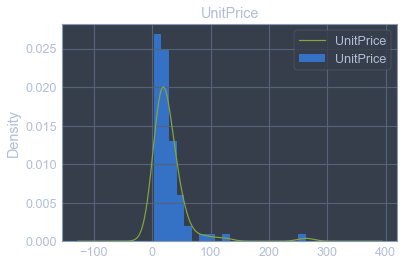

In [17]:
# Plot KDE for Product Unit Price
for column in ['UnitPrice']:
    productinfo[column].plot.hist(density = True, bins = 20)
    productinfo[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

In [18]:
# Build a join statement to get the revenues from each category
prodrev = pd.read_sql_query('''SELECT CategoryName can,
                                COUNT(ProductName) Products,
                                SUM((ord.UnitPrice * ord.Quantity)) Revenue
                                FROM OrderDetail ord
                                JOIN Product p ON ord.ProductId = p.Id
                                JOIN Category c ON p.CategoryId = c.Id
                                GROUP BY c.CategoryName
                                ORDER BY Revenue DESC
                            ''', engine)
prodrev

2019-06-20 13:07:34,177 INFO sqlalchemy.engine.base.Engine SELECT CategoryName can,
                                COUNT(ProductName) Products,
                                SUM((ord.UnitPrice * ord.Quantity)) Revenue
                                FROM OrderDetail ord
                                JOIN Product p ON ord.ProductId = p.Id
                                JOIN Category c ON p.CategoryId = c.Id
                                GROUP BY c.CategoryName
                                ORDER BY Revenue DESC
                            
2019-06-20 13:07:34,177 INFO sqlalchemy.engine.base.Engine ()


,can,Products,Revenue
0,Beverages,404,286526.95
1,Dairy Products,366,251330.50
2,Meat/Poultry,173,178188.80
3,Confections,334,177099.10
4,Seafood,330,141623.09
5,Condiments,216,113694.75
6,Produce,136,105268.60
7,Grains/Cereals,196,100726.80


In [19]:
# Find the total sum of revenue
np.round(prodrev.Revenue.sum())

1354459.0

This wraps up basic queries on the products within Northwind's database. There are eight different categories of products that Northwind sells. Northwind is a food vendor that sells products such as beverages, confections, seafood, condiments, and dairy products. Their total revenue sums to 1.35 million dollars. Their highest revenue generating category is beverages, and their lowest generating category is grains/cereals. They sell a total of 77 products with an average price of 28.80 dollars with a standard deviation of 33 dollars. Their cheapest product is sold at 2.50 dollars and their most expensive product is sold at 263.50 dollars. 

## Customer Queries

Next on exploring Northwind's database are queries on customers served. This will be performed using the same process as above - directly querying the database using the pd.read_sql_query method within pandas. Customer queries will be the final step in becoming familiar with Northwind's database. 

In [20]:
# Query how many customers in Northwind DB
custnum = pd.read_sql_query('''SELECT *
                                FROM Customer 
                                ''', engine)
print('There are', custnum.shape[0], 'customers')

2019-06-20 13:07:34,198 INFO sqlalchemy.engine.base.Engine SELECT *
                                FROM Customer 
                                
2019-06-20 13:07:34,199 INFO sqlalchemy.engine.base.Engine ()
There are 91 customers


In [21]:
# Create a table based upon orders by region
custreg = pd.read_sql_query('''SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount
                            FROM Customer c
                            JOIN [Order] o ON c.Id = o.CustomerId
                            JOIN OrderDetail od ON od.OrderId = o.Id
                         ''', engine)
custreg.head()

2019-06-20 13:07:34,208 INFO sqlalchemy.engine.base.Engine SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount
                            FROM Customer c
                            JOIN [Order] o ON c.Id = o.CustomerId
                            JOIN OrderDetail od ON od.OrderId = o.Id
                         
2019-06-20 13:07:34,209 INFO sqlalchemy.engine.base.Engine ()


,Region,OrderId,Quantity,UnitPrice,Discount
0,Western Europe,10248,12,14.0,0.0
1,Western Europe,10248,10,9.8,0.0
2,Western Europe,10248,5,34.8,0.0
3,Western Europe,10249,9,18.6,0.0
4,Western Europe,10249,40,42.4,0.0


In [22]:
# Write a query to select order quantity from customers
comporder = pd.read_sql_query("""SELECT c.CompanyName, c.Region,
                            COUNT(*) num_orders 
                            FROM [Order] o 
                            JOIN Customer c on o.CustomerID = c.ID
                            GROUP BY c.CompanyName 
                            ORDER BY num_orders DESC""", engine)
comporder.head()

2019-06-20 13:07:34,286 INFO sqlalchemy.engine.base.Engine SELECT c.CompanyName, c.Region,
                            COUNT(*) num_orders 
                            FROM [Order] o 
                            JOIN Customer c on o.CustomerID = c.ID
                            GROUP BY c.CompanyName 
                            ORDER BY num_orders DESC
2019-06-20 13:07:34,287 INFO sqlalchemy.engine.base.Engine ()


,CompanyName,Region,num_orders
0,Save-a-lot Markets,North America,31
1,Ernst Handel,Western Europe,30
2,QUICK-Stop,Western Europe,28
3,Folk och fä HB,Northern Europe,19
4,Hungry Owl All-Night Grocers,British Isles,19


This should conclude the basic queries on the consumers within Northwind's database. There are nine regions in which Northwind products are sold. Western Europe, North and South America account for a large portion of the total number of orders. They also account for the largest portion of order revenue for Northwind. However when looking at the average revenue per order, North America, Northern Europe, and Western Europe are at the top of the list. Finally, there are important items to notice within different companies who order from Northwind. Save-a-lot Markets, Ernst Handel, and Quick-Stop order the most often - each with around 30 orders. Unsurprisingly, they come from the North America and Western European regions. 

# **Hypothesis Testing**

Hypothesis testing is a statistical test that is used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population. This is represented as a NULL and ALTERNATIVE hypothesis. The null hypothesis serves as a baseline for a sample control group that infers there is no change in activity for the question at hand. It's the initial claim that researchers specify using previous research or knowledge. The alternative hypothesis is the opposite of the null hypothesis. It states that the population parameter is different than the value of the population parameter in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true. 

Based on the sample data, the test determines whether to reject the null hypothesis. You use a p-value (a=0.05), to make the determination. If the p-value is less than or equal to the level of significance, which is a cut-off point that you define, and then you can reject the null hypothesis.

## Hypothesis Test 1 - Discounts

**Test Question:**

*Do discounts have a statistically significant effect on the number of products customers order?*

In this test, Northwind will need to determine whether discounts effect the quantity of products customers will buy. To accomplish this, the total amount of products bought by customers will need to be compared to both the inclusion of a discount and the exclusion of a discount. Furthermore, after testing this theory I will explore whether certain levels of discounts effect customer buying habits. 

>**Null hypothesis (Ho)**: Discounts *do not* have a statistically significant effect on the number of products customers order. $\mu_1$ = $\mu_2$

>**Alternative hypothesis (Ha)**: Discounts *do* have a statistically significant effect on the number of products customers order. $\mu_1$ $\ne$ $\mu_2$

### Measure Population

In [23]:
# Create a table of all orders
orderdet = pd.read_sql_query('''SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail''', engine)
print(orderdet.shape)
orderdet.head()

2019-06-20 13:07:34,306 INFO sqlalchemy.engine.base.Engine SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail
2019-06-20 13:07:34,308 INFO sqlalchemy.engine.base.Engine ()
(2155, 4)


,Id,UnitPrice,Quantity,Discount
0,10248/11,14.0,12,0.0
1,10248/42,9.8,10,0.0
2,10248/72,34.8,5,0.0
3,10249/14,18.6,9,0.0
4,10249/51,42.4,40,0.0


In [24]:
# Create a table of all orders with a discount
orderdisc = pd.read_sql_query('''SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail
                                WHERE Discount > 0
                                ''', engine)
print(orderdisc.shape)
orderdisc.head()

2019-06-20 13:07:34,330 INFO sqlalchemy.engine.base.Engine SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail
                                WHERE Discount > 0
                                
2019-06-20 13:07:34,331 INFO sqlalchemy.engine.base.Engine ()
(838, 4)


,Id,UnitPrice,Quantity,Discount
0,10250/51,42.4,35,0.15
1,10250/65,16.8,15,0.15
2,10251/22,16.8,6,0.05
3,10251/57,15.6,15,0.05
4,10252/20,64.8,40,0.05


The population of orders we are working with is 2,155 entries. Each order may or may not have a discount, which would effect the proportionate revenue from each order. It looks like the discount amounts range from 0% to 25%. It looks like 838 orders actually do carry a discount, therefore, 38.9% of all orders are discounted. 

### Explore Population Data

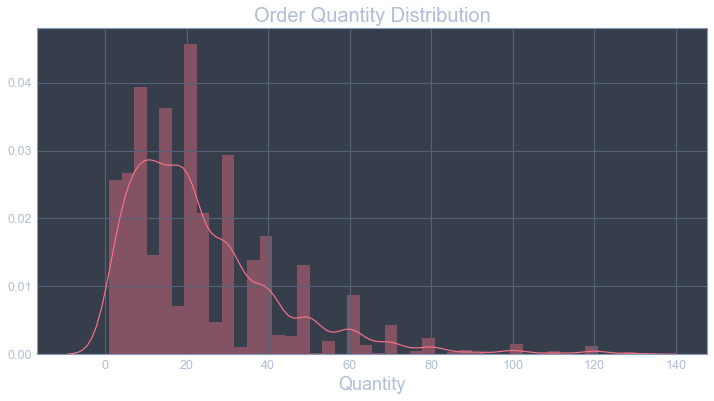

In [25]:
# Visualize the Quantity of Orders
sns.set_palette("husl")
plt.figure(figsize=(12,6))
sns.distplot(orderdet['Quantity'], hist='density')
plt.title('Order Quantity Distribution', fontsize=20)
plt.xlabel('Quantity', fontsize=18)
plt.show()

Text(0, 0.5, 'Num of Orders')

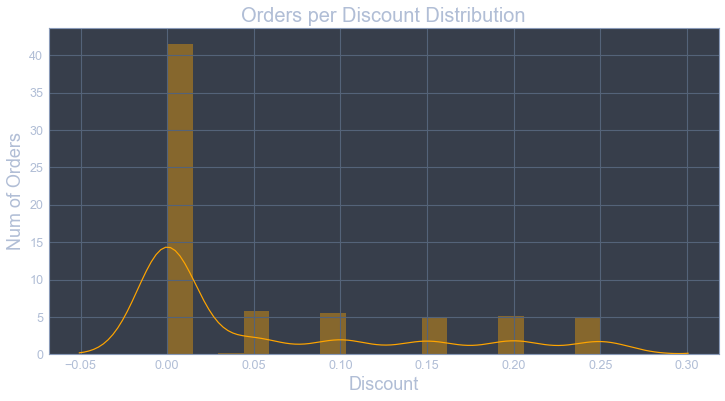

In [26]:
# Plot a distribution of the level of order per discount
plt.figure(figsize=(12,6))
sns.distplot(orderdet['Discount'], hist='density', color='orange')
plt.title('Orders per Discount Distribution', fontsize=20)
plt.xlabel('Discount', fontsize=18)
plt.ylabel('Num of Orders', fontsize=18)

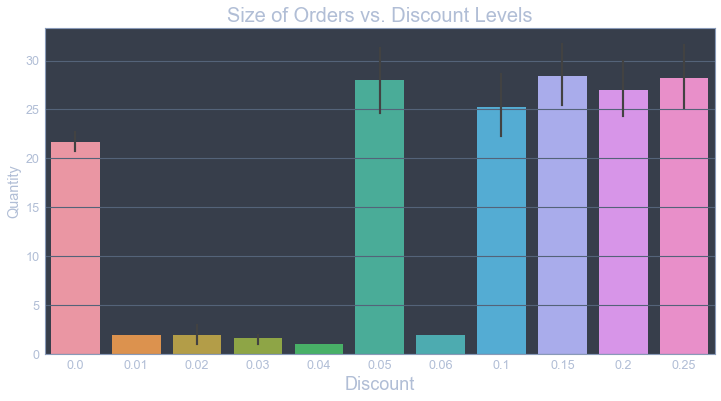

In [27]:
# Plot a distribution of Size of Orders vs. Discount Levels
plt.figure(figsize=(12,6))
sns.barplot(x = orderdet['Discount'], y = orderdet['Quantity'])
plt.title('Size of Orders vs. Discount Levels', fontsize=20)
plt.xlabel('Discount', fontsize=18)
plt.show()

In [28]:
# Find the mean amount of orders and discounts
orderdet.describe()

,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000
mean,26.218520,23.812993,0.056167
std,29.827418,19.022047,0.083450
min,2.000000,1.000000,0.000000
25%,12.000000,10.000000,0.000000
50%,18.400000,20.000000,0.000000
75%,32.000000,30.000000,0.100000
max,263.500000,130.000000,0.250000


### Set Control Groups

**Dependent Variable**  =  Quantity. This distribution is positively skewed to the right. There is a minimum order quantity of 1 and the largest order totaled 130. The average order equaled roughly 24 units with a standard deviation of 19. 

**Independent Variable**  =  Discount. If there is a discount, the levels of discount range from 5%, 10%, 15%, 20%, 25% increments. However, there is a significant number of orders with no discount applied if you glance at the 'Orders per Discount Distribution' plot.


In [29]:
# Create a control group 
control = orderdet[orderdet['Discount'] == 0]
ctrl = control['Quantity']

# Create an experiement group
experimental = orderdet[orderdet['Discount'] != 0]
exp = experimental["Quantity"]

> The **control group** is comprised of orders that did not receive a discount.

> The **experimental group** is comprised of orders that did receive a discount.

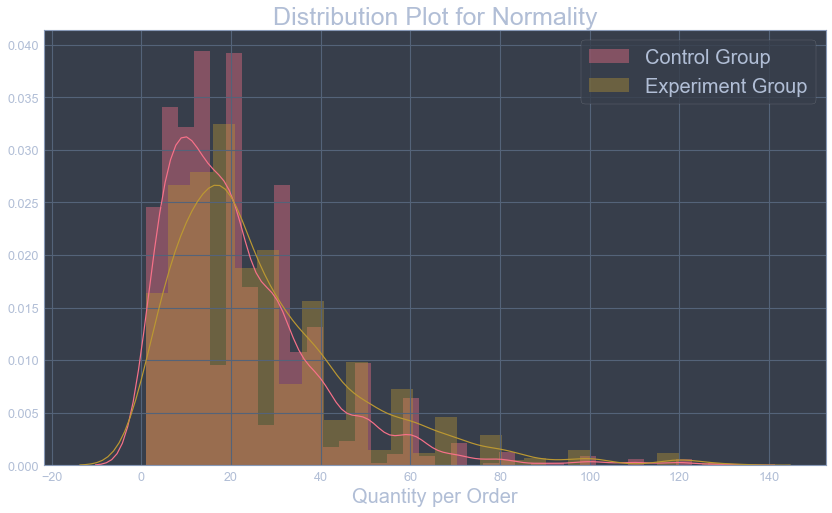

In [30]:
# Normality Distribution Plot
plt.figure(figsize=(14, 8))
sns.distplot(ctrl, label='Control Group')
sns.distplot(exp, label='Experiment Group')
plt.title('Distribution Plot for Normality', fontsize=25)
plt.xlabel('Quantity per Order', fontsize=20)
plt.legend(fontsize=20);

Overall, the distributions for these two groups are very positively skewed. However, these two distributions follow relatively the same shape. So, we could expect the data to fall in the same manner around the means. 

### Run Tests

In [31]:
# Run a levene test for unequal variances
print(stats.levene(exp.values, ctrl.values))

LeveneResult(statistic=14.832671704073421, pvalue=0.00012091378376079568)


Because there are unequal variances in the two populations (pvalue=0.00012), the Welch’s t-test can analyze if the two populations have unequal means. This should answer the first part of the question. To do this, the method used will include the Statsmodels library.

In [32]:
# Calculate the differences in mean
diff_mean = abs(ctrl.mean()-exp.mean())

# Generate sample groups
sample1 = orderdet['Quantity'].sample(100)
sample2 = orderdet.drop(sample1.index)['Quantity']

# Calculate difference of means post-sampling
diff_samp = abs(np.mean(sample1) - np.mean(sample2))

# Loop permutations
diff_perms = []
for i in range(10000):
    sample1 = orderdet['Quantity'].sample(100)
    sample2 = orderdet.drop(sample1.index)['Quantity']
    diff = np.mean(sample1) - np.mean(sample2)
    diff_perms.append(diff)

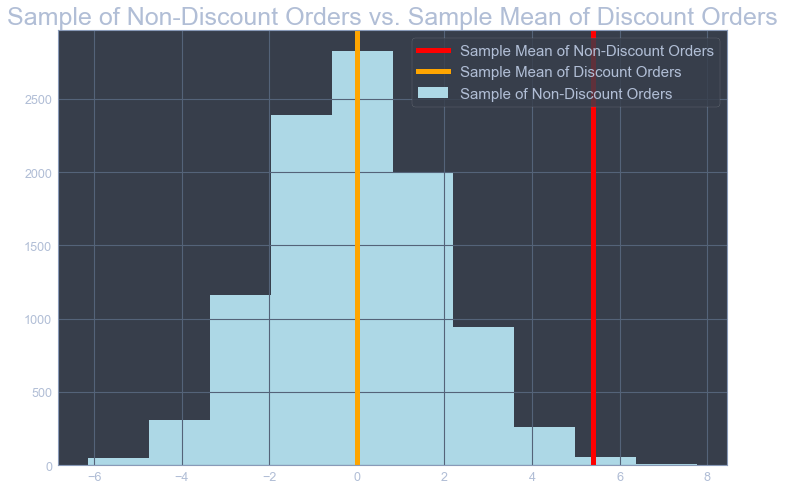

In [33]:
# Plot data distribution
plt.figure(figsize=(12, 8))
plt.title('Sample of Non-Discount Orders vs. Sample Mean of Discount Orders', fontsize=25)
plt.hist(diff_perms, label = 'Sample of Non-Discount Orders', color='lightblue')
plt.axvline(diff_mean, color = 'red', linewidth = 5, label = 'Sample Mean of Non-Discount Orders')
plt.axvline(0, color = 'orange', linewidth = 5, label = 'Sample Mean of Discount Orders')
plt.legend(fontsize=15)
plt.show()

In [34]:
# Run a T-test for the groups
print(stats.ttest_ind(exp.values, ctrl.values))

Ttest_indResult(statistic=6.4785631962949015, pvalue=1.1440924523215966e-10)


**Welch's T-Test Result**: statistic = 6.4785, pvalue = 1.14409e-10

In [35]:
# Run a Cohen-D test for the groups
def cohend(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)   
    return d
abs(cohend(ctrl, exp))

0.2862724481729283

**Cohen’s d Test**: Result = 0.2863

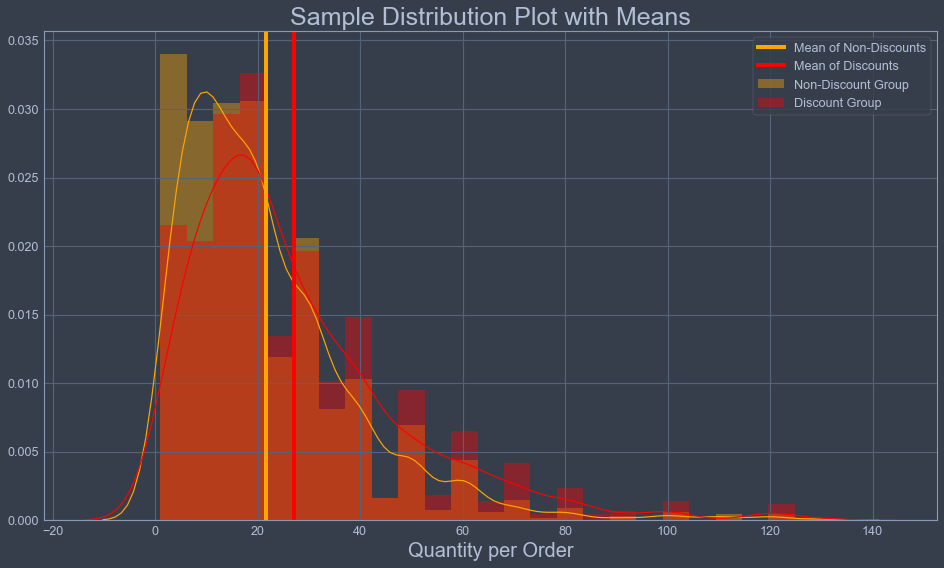

In [36]:
# Sample Distribution Plot with means
jtplot.style(theme='onedork')
plt.figure(figsize=(16,9))
sns.distplot(ctrl, bins=25,  label='Non-Discount Group', color='orange')
sns.distplot(exp, bins=25,  label='Discount Group', color='red')

plt.axvline(x=ctrl.mean(), color='orange', linestyle='-', lw=4, label='Mean of Non-Discounts')
plt.axvline(x=exp.mean(), color='red', linestyle='-', lw=4, label='Mean of Discounts')

plt.title('Sample Distribution Plot with Means', fontsize=25)
plt.xlabel('Quantity per Order', fontsize=20)
plt.legend()
plt.show()

In [37]:
# The result of all discount brackets compared to zero discounts
# Order size
diffmean = exp.mean() - ctrl.mean()
diffmean

5.394523243866239

### Interpret Results

**Reject the null hypothesis**. Discounts do have a statistically significant effect on the number of products customers order. 

There is, in fact, an effect discounts have on the order sizes given the p-value is less than the alpha set in the Welch's T-test. The p-value is 1.14409e-10, which is less than 0.05. Therefore, we can become confident in rejecting the null hypothesis. There must be a correlation between the number of products ordered and whether there is a discount applied to the order. Notice there is a clear distinction in sample population means represented by the vertical lines in the visualization above. 

Cohen’s d = 0.2863, implying the difference between the control and experimental groups is significant. It's noteworthy to use discounts to increase the number of items customers make per order. There is statistically significant differences in the mean order sizes of both groups.

## Hypothesis Test 2 - Discounts

**Test Question:**

*Do the level of discounts have a statistically significant effect on the number of products customers order?*

In this test, Northwind will need to determine whether the level of discounts effect the quantity of products customers will buy. To accomplish this, the total amount of discounted products bought by customers will need to be compared to the various levels of discounts applied to those orders.

>**Null hypothesis (Ho)**: Discount levels *do not* have a statistically significant effect on the number of products customers order. $\mu_1$ = $\mu_2$

>**Alternative hypothesis (Ha)**: Discount levels *do* have a statistically significant effect on the number of products customers order. $\mu_1$ $\ne$ $\mu_2$

### Measure Population

In [38]:
# Create a table of all orders with a discount
orderdisc = pd.read_sql_query('''SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail
                                WHERE Discount > 0
                                ''', engine)
print(orderdisc.shape)
orderdisc.head()

2019-06-20 13:07:47,541 INFO sqlalchemy.engine.base.Engine SELECT Id, UnitPrice, Quantity, Discount 
                                FROM OrderDetail
                                WHERE Discount > 0
                                
2019-06-20 13:07:47,542 INFO sqlalchemy.engine.base.Engine ()
(838, 4)


,Id,UnitPrice,Quantity,Discount
0,10250/51,42.4,35,0.15
1,10250/65,16.8,15,0.15
2,10251/22,16.8,6,0.05
3,10251/57,15.6,15,0.05
4,10252/20,64.8,40,0.05


In [39]:
orderdisc.Discount.value_counts()

0.05    185
0.10    173
0.20    161
0.15    157
0.25    154
0.03      3
0.02      2
0.04      1
0.06      1
0.01      1
Name: Discount, dtype: int64

In [40]:
# Create a dataframe that removes rows
orderdisc = orderdisc[orderdisc.Discount != 0.03]
orderdisc = orderdisc[orderdisc.Discount != 0.02]
orderdisc = orderdisc[orderdisc.Discount != 0.04]
orderdisc = orderdisc[orderdisc.Discount != 0.06]
orderdisc = orderdisc[orderdisc.Discount != 0.01]
orderdisc.Discount.value_counts()

0.05    185
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

The population of orders we are working with is 838 entries. Discount amounts range from 0% to 25%. It looks like 838 orders actually do carry a discount, therefore, 38.9% of all orders are discounted. 
    * There are 185 orders with a 5% discount. 
    * There are 173 orders with a 10% discount. 
    * There are 157 orders with a 15% discount.
    * There are 161 orders with a 20% discount.
    * There are 154 orders with a 25% discount.

### Explore Population Data

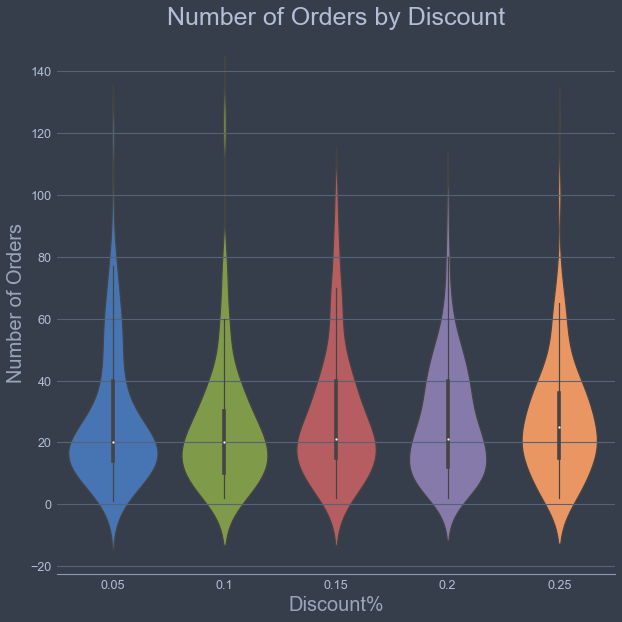

In [41]:
# Create a Violin Plot of Quantity of Orders by Discount
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="Discount",y="Quantity",data=orderdisc)
sns.despine(left=True)
ax.set_title("Number of Orders by Discount", fontsize=25)
ax.set_xlabel("Discount%",size = 16,alpha=0.8, fontsize=20)
ax.set_ylabel("Number of Orders",size = 16,alpha=0.8, fontsize=20)
plt.show()

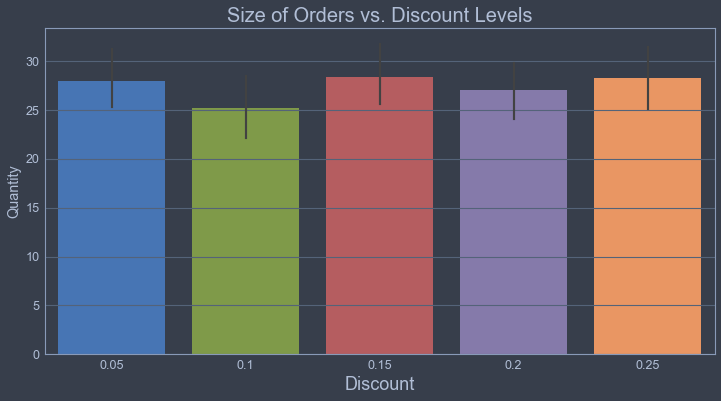

In [42]:
# Plot a distribution of Size of Orders vs. Discount Levels
plt.figure(figsize=(12,6))
sns.barplot(x = orderdisc['Discount'], y = orderdisc['Quantity'])
plt.title('Size of Orders vs. Discount Levels', fontsize=20)
plt.xlabel('Discount', fontsize=18)
plt.show()

It seems the levels of discounts follow almost a uniform distribution. The 10% level of discount carries the lowest amount of orders. The 25% level of discount carries the highest amount of orders. 

In [43]:
# Group by discount and retrieve statistics
orderdisc['Quantity'].groupby(orderdisc['Discount']).describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0.05,185.0,28.010811,22.187685,1.0,14.0,20.0,40.0,120.0
0.10,173.0,25.236994,21.186503,2.0,10.0,20.0,30.0,130.0
0.15,157.0,28.382166,20.923099,2.0,15.0,21.0,40.0,100.0
0.20,161.0,27.024845,18.832801,2.0,12.0,21.0,40.0,100.0
0.25,154.0,28.240260,20.120570,2.0,15.0,25.0,36.0,120.0


### Run Tests

In [44]:
orderdet = orderdet[orderdet.Discount != 0.03]
orderdet = orderdet[orderdet.Discount != 0.02]
orderdet = orderdet[orderdet.Discount != 0.04]
orderdet = orderdet[orderdet.Discount != 0.06]
orderdet = orderdet[orderdet.Discount != 0.01]

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------


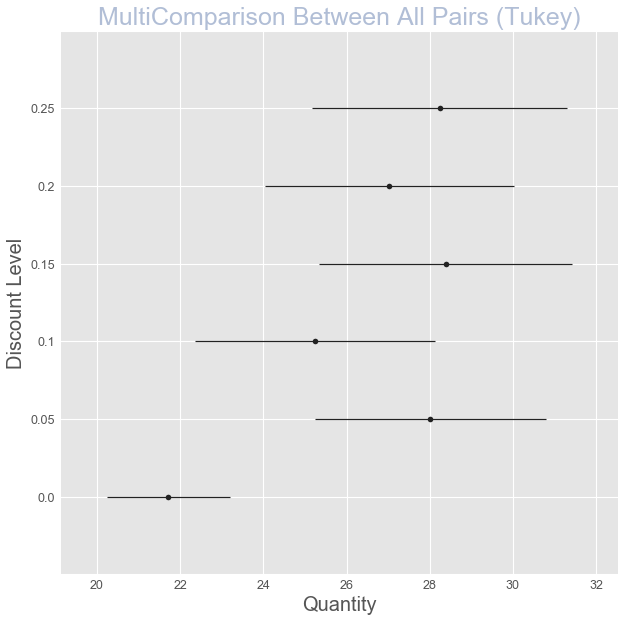

In [45]:
# Use a Multicomparison to complete a tukey test
mc = MultiComparison(orderdet['Quantity'], orderdet['Discount'])
mcres = mc.tukeyhsd()
print(mcres)

plt.style.use('ggplot')
mcres = mcres.plot_simultaneous(figsize=(10,10))
plt.title('MultiComparison Between All Pairs (Tukey)', fontsize=25)
plt.xlabel('Quantity', fontsize=20)
plt.ylabel('Discount Level', fontsize=20)
plt.show()

In [46]:
# Create an control group
control = orderdet[orderdet['Discount'] == 0.05]
ctrl = control['Quantity']

# Create an experiement group
experimental = orderdet[orderdet['Discount'] != 0]
exp = experimental["Quantity"]

In [47]:
diff_mean2 = abs(ctrl.mean()-exp.mean())

In [48]:
# The result of 0.05 discount bracket compared to discount brackets not equal to 0
# Order Size
diff_mean2 + diff_mean

6.0511171872071685

In [49]:
# Run a bartlett test to test batch variances
print(stats.bartlett(exp.values, ctrl.values))

BartlettResult(statistic=1.4476178517499512, pvalue=0.2289105732701477)


With the above Bartlett test, we are testing the null hypothesis that the batch variances are all equal. Because the p-value is larger than alpha(pvalue=0.2289), we fail to reject the null hypotheses at the 0.05 significance level. Bartlett's test is useful whenever the assumption of equal variances is made. Therefore, we can stay confident in the Tukey Test assumption of equal within-group variance across the groups associated with each mean in the test. 

### Interpret Results

**Reject the null hypothesis for all discount levels except for 10%**. All Discount levels do have a statistically significant effect on the number of products customers order, except for the 0.10 discount bracket.

There is, in fact, an effect the level of discounts have on the order sizes given results of the Tukey test. The Tukey HSD test is a statistical tool used to determine if the relationship between any two sets of data is statistically significant - indicating whether there's a strong chance that an observed numerical change in one value related to a change in another value.  The Tukey test is invoked when you need to determine if the interaction among three or more variables is mutually statistically significant. 

Given the results of the table shown above, we can reject the null hypothesis in all accounts except for the 10% bracket. This doesn't mean giving a 10% discount is harmful, it's simply implying that the results don't yield enough evidence to reject the null hypothesis in the 10% case. For all other discount brackets, there must be a correlation between the increase of number of products ordered and which discount level is applied.

## Hypothesis Test 3 - Months

**Test Question:**

*Do customers order more products in particular months of the year?*

In this test, Northwind will need to determine whether quantity from customer orders varies the different months in a year. To accomplish this, the total quantity from customer orders will need to be compared to the various months of the year in which those products were ordered.

>**Null hypothesis (Ho)**: Northwind order quantity *does not* vary between customer orders in different months. $\mu_1$ = $\mu_2$

>**Alternative hypothesis (Ha)**: Northwind order quantity *does* vary between customer orders in different months. $\mu_1$ $\ne$ $\mu_2$

### Measure Population

In [50]:
# Write a query to identify orderdate and quantity 
ordermon = pd.read_sql_query("""SELECT o.OrderDate, od.Quantity
                            FROM [Order] o
                            JOIN OrderDetail od ON od.OrderId = o.Id
                            """, engine)
print(ordermon.info())
ordermon.head()

2019-06-20 13:07:48,455 INFO sqlalchemy.engine.base.Engine SELECT o.OrderDate, od.Quantity
                            FROM [Order] o
                            JOIN OrderDetail od ON od.OrderId = o.Id
                            
2019-06-20 13:07:48,455 INFO sqlalchemy.engine.base.Engine ()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
OrderDate    2155 non-null object
Quantity     2155 non-null int64
dtypes: int64(1), object(1)
memory usage: 33.8+ KB
None


,OrderDate,Quantity
0,2012-07-04,12
1,2012-07-04,10
2,2012-07-04,5
3,2012-07-05,9
4,2012-07-05,40


In [51]:
# Add a column to indicate the name of the month ordered
ordermon['OrderDate'] = pd.to_datetime(ordermon['OrderDate'])
ordermon['Month'] = ordermon['OrderDate'].dt.strftime('%b')
ordermon.head()

,OrderDate,Quantity,Month
0,2012-07-04,12,Jul
1,2012-07-04,10,Jul
2,2012-07-04,5,Jul
3,2012-07-05,9,Jul
4,2012-07-05,40,Jul


In [52]:
ordermon.Month.value_counts()

Apr    261
Mar    255
Jan    237
Feb    201
Dec    195
Oct    179
May    155
Nov    155
Aug    153
Sep    152
Jul    136
Jun     76
Name: Month, dtype: int64

The population of orders we are working with is 2,155 entries. Each order has been separated into a new column by it's month name. By looking at value counts for this row, April has the highest amount of customer orders with 261. June has the least amount of customer orders with only 76. 

### Explore Population Data

In [53]:
ordermontot = ordermon.Month.value_counts().reset_index()
ordermontot

,index,Month
0,Apr,261
1,Mar,255
2,Jan,237
3,Feb,201
4,Dec,195
5,Oct,179
6,May,155
7,Nov,155
8,Aug,153
9,Sep,152


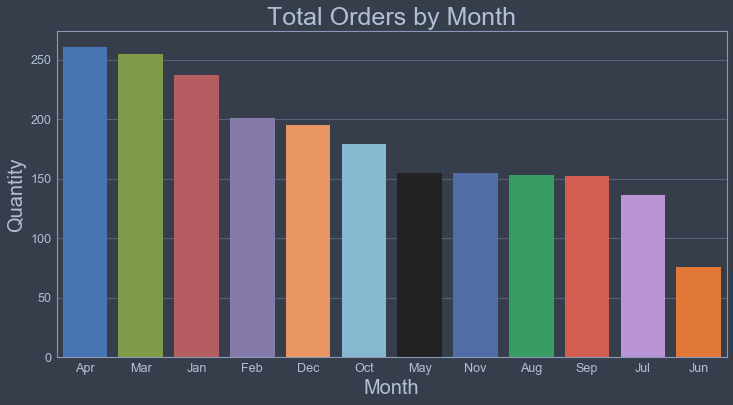

In [54]:
# Plot a distribution of Total Orders vs. Months
jtplot.style(theme='onedork')
plt.figure(figsize=(12,6))
sns.barplot(x = ordermontot['index'], y = ordermontot['Month'])
plt.title('Total Orders by Month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Quantity', fontsize=20)
plt.show()

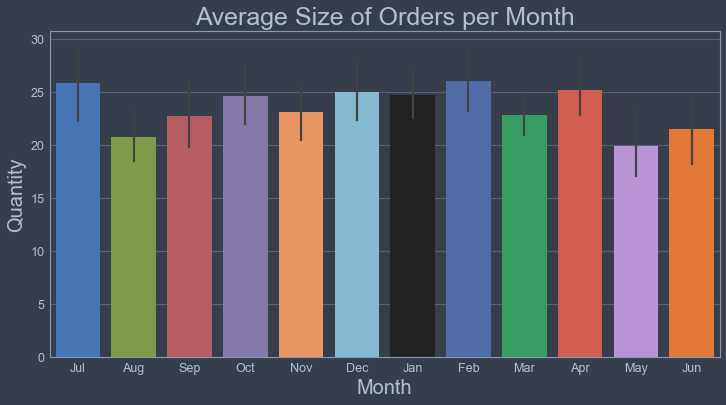

In [55]:
# Plot a distribution of Average Size of Orders vs. Months
jtplot.style(theme='onedork')
plt.figure(figsize=(12,6))
sns.barplot(x = ordermon['Month'], y = ordermon['Quantity'])
plt.title('Average Size of Orders per Month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Quantity', fontsize=20)
plt.show()

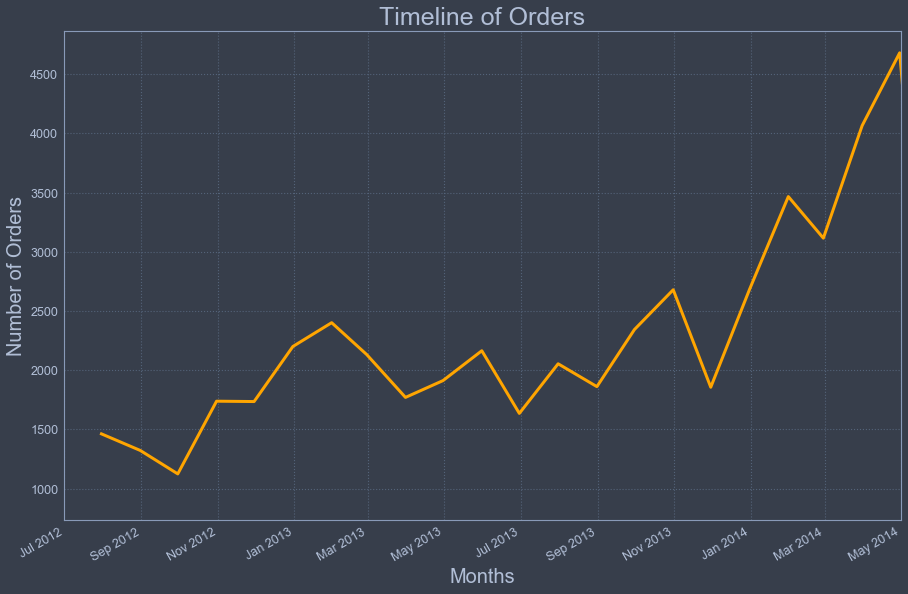

In [56]:
# Plotting a timeline of orders
orderspermon = ordermon.set_index('OrderDate').groupby(pd.Grouper(freq='M'))['Quantity'].sum()

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(orderspermon.index, orderspermon.values, marker='x', color='orange', linewidth=3)
ax.set_title('Timeline of Orders', size=25)
ax.set_xlabel('Months', size=20)
ax.set_ylabel('Number of Orders', size=20)
ax.grid(linestyle=':')
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xlim(left='2012-07-01', right='2014-05-01')
fig.autofmt_xdate();

### Run Tests

This test will be executed through a process called ANOVA. This tests generalizes procedures to test differences, such as in the mean of populations, between multiple groups. This starts with sample observations from multiple groups. Since ANOVA is looking to explain the total variance as combinations of variance from the various groups, we typically design a multiple groups experiment to test various independent factors that we hypothesis may influence the overall result. In this experiment, the 'multiple groups' are signified by the various *months* within Northwind.

In [57]:
lm = ols('Quantity ~ C(Month)', ordermon).fit()
sm.stats.anova_lm(lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Month),7395.980026,11.0,1.866405,0.039229
Residual,772003.656168,2143.0,NaN,NaN


ANOVA TEST: PR(>F) = 0.039229

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.866
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0392
Time:                        13:07:49   Log-Likelihood:                -9394.8
No. Observations:                2155   AIC:                         1.881e+04
Df Residuals:                    2143   BIC:                         1.888e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.2567      1.175     21.498      0.000      22.953      27.561
C(Month)[T.Aug]    -4.4528      1.933     -2.304      0.021      -8.243      -0.663
C(Month)[T.Dec]    -0.2208      1.797     -0.123      0.902      -3.744       3.302
C(Month)[T.Feb]     0.8478      1.781      0.476      0.634      -2.645       4.341
C(Month)[T.Jan]    -0.5014      1.703     -0.294      0.768      -3.841       2.838
C(Month)[T.Jul]     0.5962      2.007      0.297      0.766      -3.340       4.533
C(Month)[T.Jun]    -3.7435      2.474     -1.513      0.130      -8.595       1.108
C(Month)[T.Mar]    -2.3744      1.671     -1.421      0.156      -5.652       0.903
C(Month)[T.May]    -5.3535      1.925     -2.781      0.005      -9.128      -1.579
C(Month)[T.Nov]    -2.0890      1.925     -1.085      0.278      -5.863       1.685
C(Month)[T.Oct]    -0.5807      1.842     -0.315      0.753      -4.193       3.031
C(Month)[T.Sep]    -2.4475      1.937     -1.264      0.206      -6.245       1.350
==============================================================================
Omnibus:                      779.264   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2955.467
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                       7.526   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret Results

**Rejected the null hypothesis**. Northwind order quantity *does* vary between customer orders in different months. There is, in fact, a significant variation in order quantities between different months of the year. The p-value is less than the alpha set in the Welch's T-test. The p-value is 0.039229, which is less than the standard alpha of 0.05. If we were to have previously set an alpha value lower then the standard 0.05, such as 0.03, we could have failed to reject the null hypothesis. This result is close to our alpha, so it could be suggested to run another test or research an acceptable p-value for this experiment. June could be indicated as an outlier in this experiment because the month only occurs once in the dataset.

## Hypothesis Test 4 - Regions

**Test Question:**

*Does Northwind order revenue alternate between customer orders from different regions?*

In this test, Northwind will need to determine whether order revenue from customer orders varies between the regions they serve. To accomplish this, the total amount of revenue from customer orders will need to be compared to the various regions in which those products were ordered.

>**Null hypothesis (Ho)**: Northwind order revenue *does not* alternate between customer orders from different regions. $\mu_1$ = $\mu_2$

>**Alternative hypothesis (Ha)**: Northwind order revenue *does* alternate between customer orders from different regions. $\mu_1$ $\ne$ $\mu_2$

### Measure Population

In [59]:
# Query the database to create a dataframe
regionord = pd.read_sql_query('''SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount
                                      FROM Customer c
                                      JOIN [Order] o ON c.Id = o.CustomerId
                                      JOIN OrderDetail od ON od.OrderId = o.Id''', engine)
print(regionord.shape)
print(regionord.Region.value_counts())
regionord.head()

2019-06-20 13:07:49,621 INFO sqlalchemy.engine.base.Engine SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount
                                      FROM Customer c
                                      JOIN [Order] o ON c.Id = o.CustomerId
                                      JOIN OrderDetail od ON od.OrderId = o.Id
2019-06-20 13:07:49,622 INFO sqlalchemy.engine.base.Engine ()
(2078, 5)
Western Europe     736
North America      427
South America      304
British Isles      190
Northern Europe    143
Southern Europe    137
Scandinavia         70
Central America     55
Eastern Europe      16
Name: Region, dtype: int64


,Region,OrderId,Quantity,UnitPrice,Discount
0,Western Europe,10248,12,14.0,0.0
1,Western Europe,10248,10,9.8,0.0
2,Western Europe,10248,5,34.8,0.0
3,Western Europe,10249,9,18.6,0.0
4,Western Europe,10249,40,42.4,0.0


The population of orders we are working with is 2,078 entries. Each order may or may not have a discount, which would effect the proportionate revenue from each order. Western Europe has the most amount of orders with 736. Eastern Europe has the least amount of orders with only 16. 

In [60]:
# Add a column calculating the revenue for each order
regionord['OrderRev'] = regionord.Quantity * regionord.UnitPrice * (1 - regionord.Discount)
regionord.OrderRev.astype(float)
regionord.OrderRev.round(2)
regionord.head()

,Region,OrderId,Quantity,UnitPrice,Discount,OrderRev
0,Western Europe,10248,12,14.0,0.0,168.0
1,Western Europe,10248,10,9.8,0.0,98.0
2,Western Europe,10248,5,34.8,0.0,174.0
3,Western Europe,10249,9,18.6,0.0,167.4
4,Western Europe,10249,40,42.4,0.0,1696.0


### Explore Population Data

In [61]:
# Find the sum of revenue from each region
regionordsum = regionord.groupby(['Region'])['OrderRev'].sum().reset_index()
regionordsum

,Region,OrderRev
0,British Isles,108951.2150
1,Central America,16558.1000
2,Eastern Europe,3531.9500
3,North America,295780.9005
4,Northern Europe,87156.1625
5,Scandinavia,24545.2025
6,South America,142677.8080
7,Southern Europe,45225.7175
8,Western Europe,503548.4085


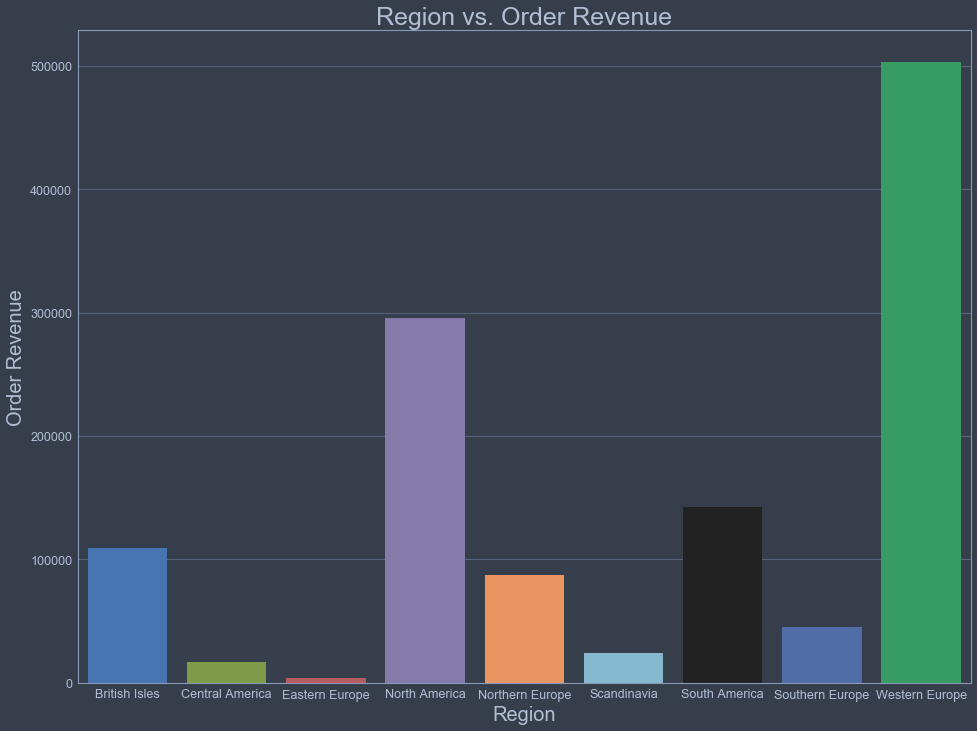

In [62]:
# Plot a bar plot for the order revenue
plt.figure(figsize=(16,12))
sns.barplot(x = regionordsum['Region'], y = regionordsum['OrderRev'])
plt.title('Region vs. Order Revenue', fontsize=25)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Order Revenue', fontsize=20)
plt.show()

In [63]:
# Find the sum of per order revenue from each region
regionord.groupby(['Region'])['OrderRev'].mean().reset_index()
regionord.head()

,Region,OrderId,Quantity,UnitPrice,Discount,OrderRev
0,Western Europe,10248,12,14.0,0.0,168.0
1,Western Europe,10248,10,9.8,0.0,98.0
2,Western Europe,10248,5,34.8,0.0,174.0
3,Western Europe,10249,9,18.6,0.0,167.4
4,Western Europe,10249,40,42.4,0.0,1696.0


In [64]:
# log-transforming OrderRev into a dataframe
regionordlog = regionord.copy()
regionordlog['OrderRev'] = np.log(regionord['OrderRev'])
regionordlog.head()

,Region,OrderId,Quantity,UnitPrice,Discount,OrderRev
0,Western Europe,10248,12,14.0,0.0,5.123964
1,Western Europe,10248,10,9.8,0.0,4.584967
2,Western Europe,10248,5,34.8,0.0,5.159055
3,Western Europe,10249,9,18.6,0.0,5.120386
4,Western Europe,10249,40,42.4,0.0,7.436028


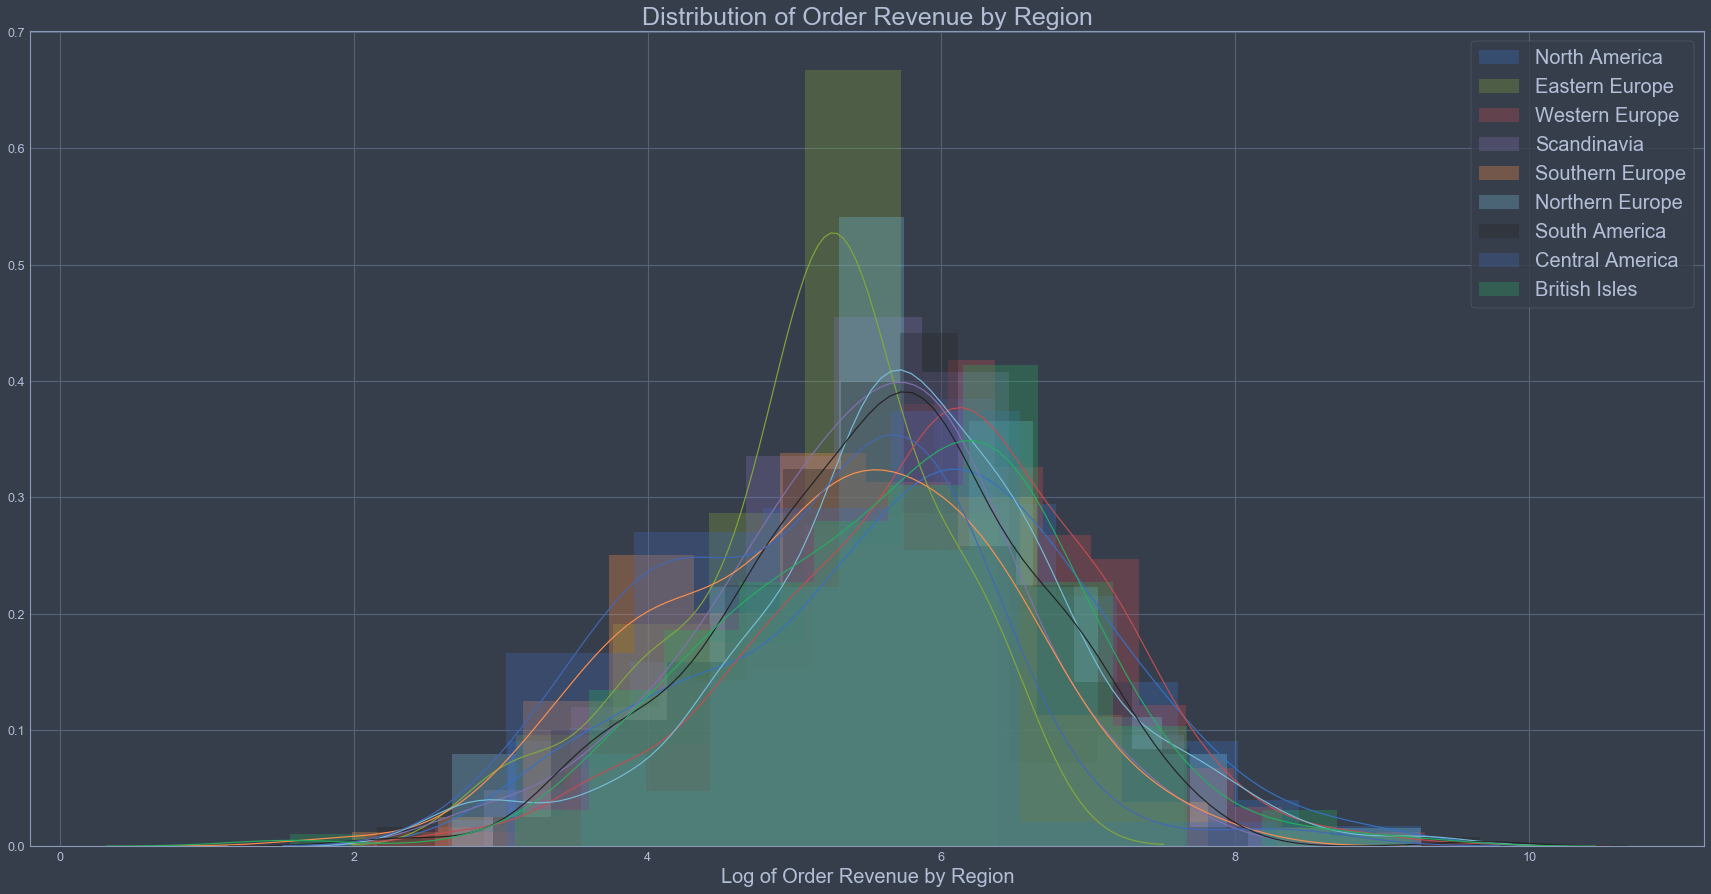

In [65]:
# Plot the distribution of Per Order Revenue by Region
jtplot.style(theme='onedork')
# sns.set_palette("husl")
plt.figure(figsize=(30,15))
for region in set(regionordlog.Region):
    regionplot = regionordlog.loc[regionordlog['Region'] == region]
    sns.distplot(regionplot['OrderRev'], hist_kws=dict(alpha=0.3), kde_kws=dict(alpha=10), label=region)
    plt.title('Distribution of Order Revenue by Region', fontsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Log of Order Revenue by Region', fontsize=20)

In [66]:
regionord.groupby(['Region'])['Region'].count()

Region
British Isles      190
Central America     55
Eastern Europe      16
North America      427
Northern Europe    143
Scandinavia         70
South America      304
Southern Europe    137
Western Europe     736
Name: Region, dtype: int64

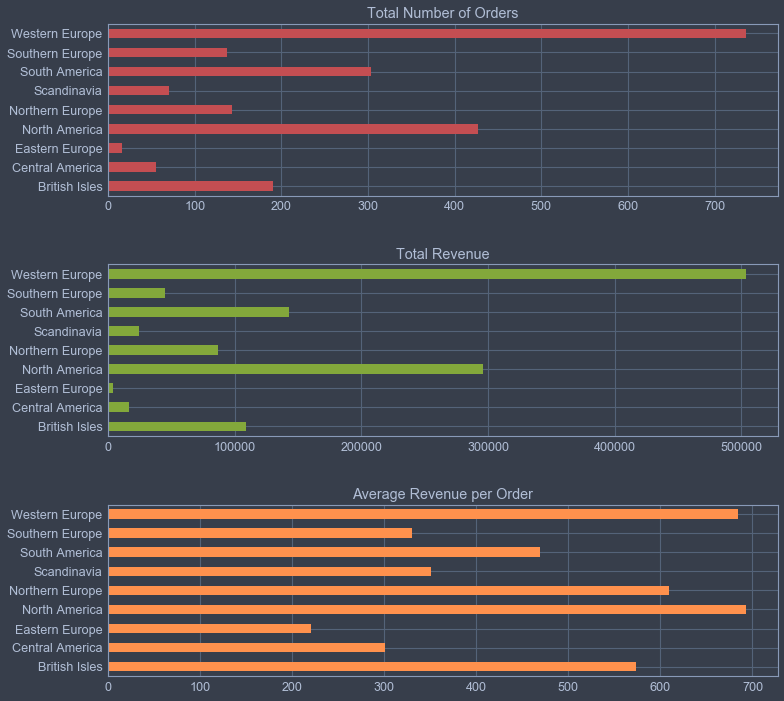

In [67]:
# Plotting the number of orders, total revenue per order and average revenue per order for each Category
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
regionord.groupby(['Region'])['Region'].count().plot(kind='barh', ax=ax1, color ='r')
regionord.groupby(['Region'])['OrderRev'].sum().plot(kind='barh', ax=ax2, color ='g')
regionord.groupby(['Region'])['OrderRev'].mean().plot(kind='barh', ax=ax3, color ='y')
ax1.set_title('Total Number of Orders')
ax1.set_ylabel('')
ax2.set_title('Total Revenue')
ax2.set_ylabel('')
ax3.set_title('Average Revenue per Order')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

Clearly there are differences in the mean, or average revenue per region. Northwind should expect to receive different levels of income from various regions. North America holds the highest revenue per order at 692.70 dollars. Eastern Europe holds the lowest revenue per order 220.75 dollars. Let's run a test on a sample group to see if this holds true. 

### Run Tests

This test will be executed through a process called ANOVA. This tests generalizes procedures to test differences, such as in the mean of populations, between multiple groups. This starts with sample observations from multiple groups. Since ANOVA is looking to explain the total variance as combinations of variance from the various groups, we typically design a multiple groups experiment to test various independent factors that we hypothesis may influence the overall result. In this experiment, the 'multiple groups' are signified by the various *regions* within Northwind. 

In [68]:
# Run ANOVA Test
lm = ols('OrderRev ~ C(Region)', regionordlog).fit()
table = sm.stats.anova_lm(lm, type=2)
print(table)

               df       sum_sq    mean_sq          F        PR(>F)
C(Region)     8.0   106.890025  13.361253  10.264998  3.619410e-14
Residual   2069.0  2693.077333   1.301632        NaN           NaN


In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               OrderRev   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     10.26
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           3.62e-14
Time:                        13:07:51   Log-Likelihood:                -3217.9
No. Observations:                2078   AIC:                             6454.
Df Residuals:                    2069   BIC:                             6505.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.7323      0.083     69.257      0.000       5.570       5.895
C(Region)[T.Central America]    -0.6248      0.175     -3.577      0.000      -0.967      -0.282
C(Region)[T.Eastern Europe]     -0.6293      0.297     -2.119      0.034      -1.212      -0.047
C(Region)[T.North America]       0.0646      0.099      0.649      0.516      -0.131       0.260
C(Region)[T.Northern Europe]     0.0349      0.126      0.276      0.782      -0.213       0.283
C(Region)[T.Scandinavia]        -0.2966      0.160     -1.859      0.063      -0.609       0.016
C(Region)[T.South America]      -0.1488      0.106     -1.410      0.159      -0.356       0.058
C(Region)[T.Southern Europe]    -0.4956      0.128     -3.876      0.000      -0.746      -0.245
C(Region)[T.Western Europe]      0.2039      0.093      2.196      0.028       0.022       0.386
==============================================================================
Omnibus:                       16.176   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.389
Skew:                          -0.204   Prob(JB):                     0.000276
Kurtosis:                       3.150   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ANOVA TEST**: PR(>F) = 3.619410e-14

### Interpret Results

**Rejected the null hypothesis**. Northwind revenue *does* alternate between customer orders from different regions.

Provided with the result of  PR(>F) = 3.619410e-14 in the ANOVA test and an alpha set to 0.05, I can be confident in rejecting the null hypothesis. There is a statistically significant difference in the revenue from customer orders in different regions. On average, customers from different regions will buy different quantities of products in quite disparate ways. North America, Northern Europe, and the British Isles formulate the highest revenue per orders. Eastern Europe and Central America compose of the lowest revenue per order.

## Hypothesis Test 5 - Products

**Test Question:**

*Does Northwind order revenue alternate between customer orders from different product categories?*

In this test, Northwind will need to determine whether order revenue from customer orders varies between the categories of products they sell. To accomplish this, the total amount of revenue from customer orders will need to be compared to the various product categories of which those products were ordered.

>**Null hypothesis (Ho)**: Northwind order revenue *does not* alternate between customer orders from different product categories. $\mu_1$ = $\mu_2$

>**Alternative hypothesis (Ha)**: Northwind order revenue *does* alternate between customer orders from different product categories. $\mu_1$ $\ne$ $\mu_2$

### Measure Population

In [70]:
# Query to find revenues per order by category
prodrev = pd.read_sql_query('''SELECT c.CategoryName, od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) CatRev
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Product p ON od.ProductId = p.Id
                            JOIN Category c ON p.CategoryId = c.Id
                            GROUP BY od.OrderId
                            ORDER BY od.OrderId
                    ''', engine)
print(prodrev.shape)
print(prodrev.CategoryName.value_counts())
prodrev.head()

2019-06-20 13:07:51,523 INFO sqlalchemy.engine.base.Engine SELECT c.CategoryName, od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) CatRev
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Product p ON od.ProductId = p.Id
                            JOIN Category c ON p.CategoryId = c.Id
                            GROUP BY od.OrderId
                            ORDER BY od.OrderId
                    
2019-06-20 13:07:51,524 INFO sqlalchemy.engine.base.Engine ()
(830, 3)
Beverages         162
Seafood           150
Confections       150
Dairy Products    117
Condiments         74
Meat/Poultry       67
Produce            64
Grains/Cereals     46
Name: CategoryName, dtype: int64


,CategoryName,OrderId,CatRev
0,Dairy Products,10248,440.00
1,Produce,10249,1863.40
2,Seafood,10250,1552.60
3,Grains/Cereals,10251,654.06
4,Confections,10252,3597.90


In [71]:
# Find the average revenue per order
prodrev.groupby(['CategoryName'])['CatRev'].describe()

,count,mean,std,min,25%,50%,75%,max
CategoryName,,,,,,,,
Beverages,162.0,1830.850960,2684.689765,33.75,431.950000,836.3250,2043.720000,16387.500
Condiments,74.0,1548.860257,1636.449545,48.75,548.300000,974.9095,2030.966875,10191.700
Confections,150.0,1405.840953,1583.768773,49.80,472.403125,917.2500,1748.381250,10952.845
Dairy Products,117.0,1404.428662,1685.807326,12.50,439.200000,890.0000,1692.800000,11380.000
Grains/Cereals,46.0,1025.395761,988.540430,23.80,291.000000,856.8500,1403.400000,4705.500
Meat/Poultry,67.0,1986.493709,2027.916472,80.10,712.900000,1432.7140,2576.555000,10835.240
Produce,64.0,1666.222188,1560.084847,112.00,648.000000,1224.9500,2020.645000,7390.200
Seafood,150.0,1283.224833,1268.133064,18.40,373.574375,881.1400,1818.375000,8902.500


The population of orders we are working with is 830 entries. Each order may or may not have a discount, which would effect the proportionate revenue from each order. The category of beverages has the most amount of orders with 162. Grains and Cereals has the least amount of orders with only 46. The average revenue per order is the highest in the meat/poultry category. The average revenue per order is the lowest in the grains/cereals category.

### Explore Population Data

In [72]:
# Find the sum of revenue by category
prodrevsum = prodrev.groupby(['CategoryName'])['CatRev'].sum().reset_index()
prodrevsum

,CategoryName,CatRev
0,Beverages,296597.8555
1,Condiments,114615.6590
2,Confections,210876.1430
3,Dairy Products,164318.1535
4,Grains/Cereals,47168.2050
5,Meat/Poultry,133095.0785
6,Produce,106638.2200
7,Seafood,192483.7250


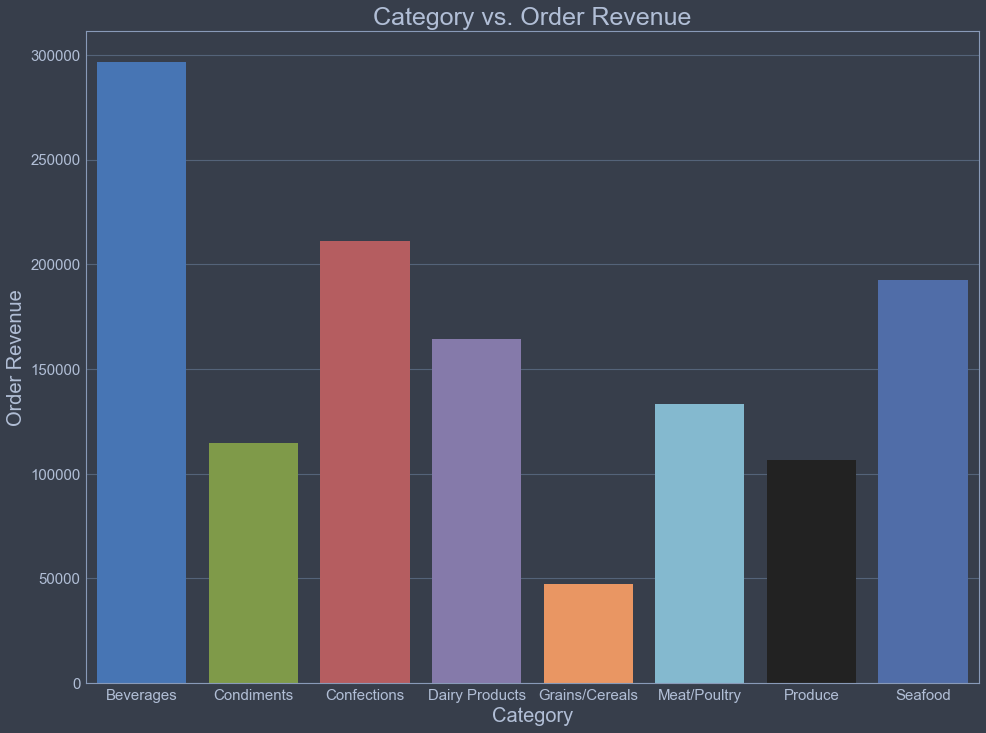

In [73]:
# Plot a bar plot for the order revenue by category
plt.figure(figsize=(16,12))
sns.barplot(x = prodrevsum['CategoryName'], y = prodrevsum['CatRev'])
plt.title('Category vs. Order Revenue', fontsize=25)
plt.xlabel('Category', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Order Revenue', fontsize=20)
plt.show()

In [74]:
# Group the dataframe by CategoryName and Category Revenue
prodrev.groupby(['CategoryName'])['CatRev'].mean().reset_index()
prodrev.head()

,CategoryName,OrderId,CatRev
0,Dairy Products,10248,440.00
1,Produce,10249,1863.40
2,Seafood,10250,1552.60
3,Grains/Cereals,10251,654.06
4,Confections,10252,3597.90


In [75]:
# log-transforming CatRev into a dataframe
prodrevlog = prodrev.copy()
prodrevlog['CatRev'] = np.log(prodrev['CatRev'])
prodrevlog.head()

,CategoryName,OrderId,CatRev
0,Dairy Products,10248,6.086775
1,Produce,10249,7.530158
2,Seafood,10250,7.347686
3,Grains/Cereals,10251,6.483199
4,Confections,10252,8.188106


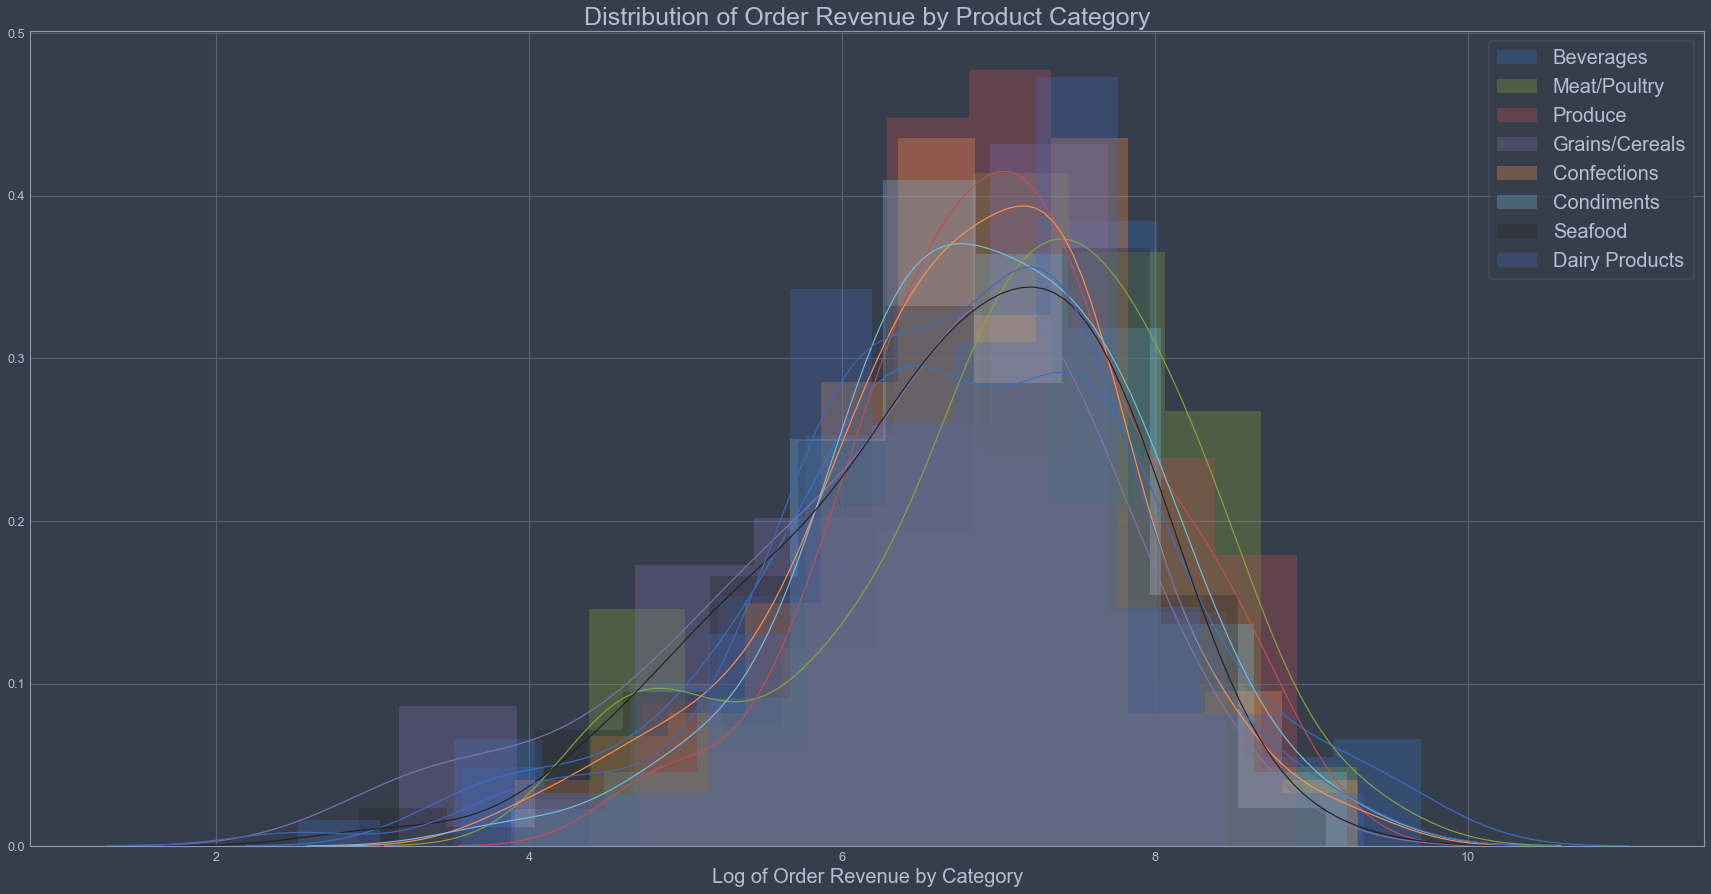

In [76]:
# Plot the distribution of Order Revenue by Product Category
plt.figure(figsize=(30,15))
for category in set(prodrevlog.CategoryName):
    catplot = prodrevlog.loc[prodrevlog['CategoryName'] == category]
    sns.distplot(catplot['CatRev'], hist_kws=dict(alpha=0.3), kde_kws=dict(alpha=10), label=category)
    plt.title('Distribution of Order Revenue by Product Category', fontsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Log of Order Revenue by Category', fontsize=20)

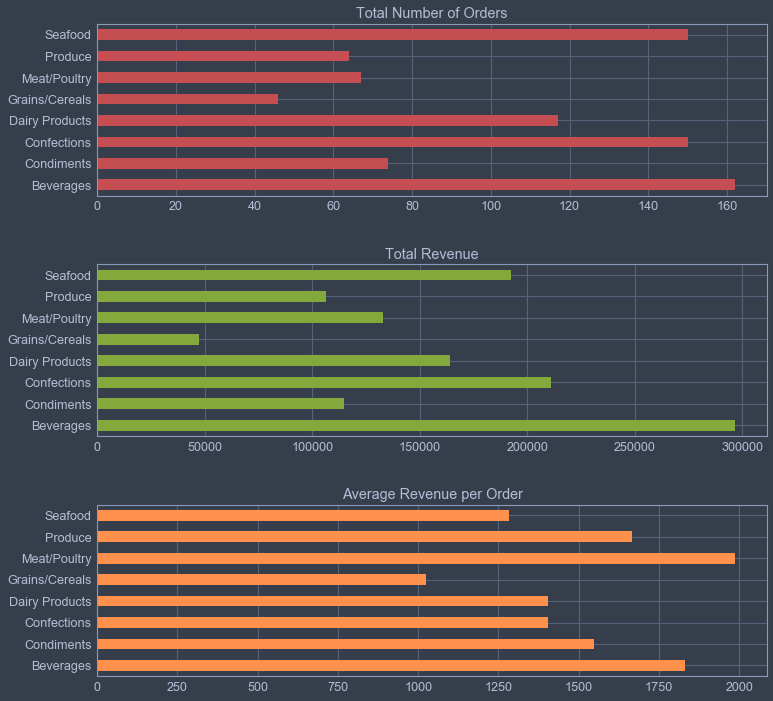

In [77]:
# Plotting the number of orders, total revenue per order and average revenue per order for each Category
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
prodrev.groupby(['CategoryName'])['CategoryName'].count().plot(kind='barh', ax=ax1, color ='r')
prodrev.groupby(['CategoryName'])['CatRev'].sum().plot(kind='barh', ax=ax2, color ='g')
prodrev.groupby(['CategoryName'])['CatRev'].mean().plot(kind='barh', ax=ax3, color ='y')
ax1.set_title('Total Number of Orders')
ax1.set_ylabel('')
ax2.set_title('Total Revenue')
ax2.set_ylabel('')
ax3.set_title('Average Revenue per Order')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

### Run Tests

This test will be again executed through a process called ANOVA. This tests generalizes procedures to test differences, such as in the mean of populations, between multiple groups. This starts with sample observations from multiple groups. Since ANOVA is looking to explain the total variance as combinations of variance from the various groups, we typically design a multiple groups experiment to test various independent factors that we hypothesis may influence the overall result. In this experiment, the 'multiple groups' are signified by the various *Product Categories* within Northwind. 

In [78]:
# Run ANOVA Test
lm = ols('CatRev ~ C(CategoryName)', prodrevlog).fit()
table = sm.stats.anova_lm(lm, type=2)
print(table)

                    df       sum_sq   mean_sq         F    PR(>F)
C(CategoryName)    7.0    21.696550  3.099507  2.433499  0.017976
Residual         822.0  1046.967838  1.273684       NaN       NaN


In [79]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CatRev   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.433
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0180
Time:                        13:07:53   Log-Likelihood:                -1274.1
No. Observations:                 830   AIC:                             2564.
Df Residuals:                     822   BIC:                             2602.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             6.7749      0.089     76.407      0.000       6.601       6.949
C(CategoryName)[T.Condiments]         0.1326      0.158      0.837      0.403      -0.178       0.443
C(CategoryName)[T.Confections]        0.0052      0.128      0.041      0.968      -0.246       0.256
C(CategoryName)[T.Dairy Products]    -0.0757      0.137     -0.553      0.581      -0.344       0.193
C(CategoryName)[T.Grains/Cereals]    -0.4015      0.189     -2.129      0.034      -0.772      -0.031
C(CategoryName)[T.Meat/Poultry]       0.2958      0.164      1.804      0.072      -0.026       0.618
C(CategoryName)[T.Produce]            0.2545      0.167      1.527      0.127      -0.073       0.582
C(CategoryName)[T.Seafood]           -0.1238      0.128     -0.968      0.333      -0.375       0.127
==============================================================================
Omnibus:                       32.426   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.489
Skew:                          -0.473   Prob(JB):                     1.97e-08
Kurtosis:                       3.363   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ANOVA TEST**: PR(>F) = 0.017976

### Interpret Results

**Rejected the null hypothesis**. Northwind revenue *does* alternate between customer orders from different product categories.

Provided with the result of PR(>F) = 0.017976 in the ANOVA test and an alpha set to 0.05, I can be confident in rejecting the null hypothesis. There is a statistically significant difference in the revenue from customer orders in different product categories. On average, Northwind will incur variations in revenue based upon which product category is included in the order. Meat/Poultry, Beverages, and Produce formulate the highest revenue per orders. Grains/Cereals compose of the lowest revenue per order. 

# **Conclusions**

To reiterate the usefulness of this business case, Northwind will use the resulting hypothesis tests to make future business decisions about current business practices - including discount levels, supply stocks, region awareness, and product promotions. The scope of the project included the Northwind database, the economic health of buyers in the corresponding regions, and the value of predictors that contribute to product sales. The project began on Monday June 10th, 2019 and was completed within a week, on Sunday June, 16th 2019. It's expected that all stakeholders involved will conclude with the same understanding of the hypothesis testing.

### Recommendation 1

**Add 5% Discounts to Products**

Overall on average, when there is a discount applied to an order, customers will add 5.39 more units to their order. Also, there is a statistically significant difference in quantity between products that have a 5%, 10%, 15%, %20, and 25% discount compared to orders that have with no discount. Adding discounts incentivizes the customers to buy more of a given product at almost all discount levels tested. Specifically, the optimum level of discount is 5% because it retains the most amount of revenue for the company and customers buy 6.1 more units (more than the average discount at all levels). 

### Recommendation 2

**Stock Up Before Quarter 1**

Northwind order quantity varies between customer orders in different months. Specifically, order quantities are much higher in the earlier months of the year compared to the later months. Between the months of January through April, 954 orders out of 2155 are completed. That totals to 44% of all orders are completed in the first four months of the year. Furthermore, there is a significant variation in order quantities between different months of the year. The four months at the beginning of the year also incur a *higher than average* order size. These orders are almost 2 units higher than the average order in the year.

### Recommendation 3

**Target North America**

There is a difference in the revenue from customer orders in different regions. Western European customers place the most orders and are the most important region for Northwind’s bottom line. Nevertheless, even though North American customers have placed roughly half as many orders as those from Western Europe, they spend more per order, on average. North American consumers spend 8 more dollars on orders compared to the leading region of Western Europe. North American customers have placed a similar number of orders to those from South and Central America, but their average expenditure per order is almost 2x higher. 

### Recommendation 4

**Sell More Meat/Poultry** 

There is a difference in the revenue from customer orders in different product categories. The product category of beverages both account for the highest total amount of orders and the most revenue out of any other category. However, even though the meat/poultry category is ordered almost 2.4x less than the beverage category, the meat/poultry category accounts for the highest per order revenue. When customers buy meat/poultry, they spend almost 200 dollars more on the order. 

### Overall Recommendation

**Create A Plan**

Before the start of Q1 next year, run a 5% discount promotion on meat/poultry products for North American consumers. 

### Further Work

**Need Information on Cost of Goods Sold**

If Northwind could provide a table within this database to identify the cost of production and distribution for products they sell, there could a vast number of testing to be completed and recommendations to be given. If COGS was provided, further analysis of product profits, including discounts, could be applied. 